<a href="https://colab.research.google.com/github/sandeepseshadri/ANN-Bank-Churn/blob/main/ANN_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# **Data Dictionary**

**CustomerId:** Unique ID which is assigned to each customer

**Surname:** Last name of the customer 

**CreditScore:** It defines the credit history of the customer.  

**Geography:** A customer’s location    

**Gender:** It defines the Gender of the customer   

**Age:** Age of the customer     

**Tenure:** Number of years for which the customer has been with the bank

**NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.

**Balance:** Account balance

**HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.

**EstimatedSalary:** Estimated salary 

**isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

**Excited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values             

*   0=No ( Customer did not leave the bank )
*   1=Yes ( Customer left the bank )

In [428]:
import warnings
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [429]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [430]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/AIML/ANN - Bank Churn Prediction/'
dataset_file = project_path + 'bank.csv'

## Reading Dataset and Feature Elimination
- Read the dataset properly 
- Print the overview of the data (statistical summary, shape, info, etc) 
- Eliminate the unique features from the dataset with proper reasoning


In [431]:
#reading dataset
df = pd.read_csv(dataset_file)

In [432]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [433]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [435]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [436]:
# dropping CustomerId since this is just a unique value
df = df.drop("CustomerId", axis=1)

# dropping RowNumber since this is just a unique value
df = df.drop("RowNumber", axis=1)

# surname doesnt add any value in churn predictions hence we can just remove it
df = df.drop("Surname", axis=1)

In [437]:
#converting object into categorical 
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [438]:
# function to display Missing values for a dataframe
def checkna(data):
    missing_values = data.isna().sum().reset_index()
    missing_values.columns = ["Features", "Missing_Values"]
    missing_values["Missing_Percent"] = round(
        missing_values.Missing_Values / len(data) * 100, 2
    )
    return missing_values[missing_values.Missing_Values > 0]

In [439]:
# Check for missing values.
checkna(df)

,Features,Missing_Values,Missing_Percent


No missing values

In [440]:
# Check for duplicated data
df[df.duplicated()].count()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No duplicated data

In [441]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Observations

---

- max credit score is 850 
- 25% customers have 0 balance





In [442]:
# Check for null values.
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null values


## Perform an Exploratory Data Analysis on the data**
- Checked whether the dataset is balanced or not 
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Any other exploratory deep dive


In [443]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram


#### Observation on CreditScore
           

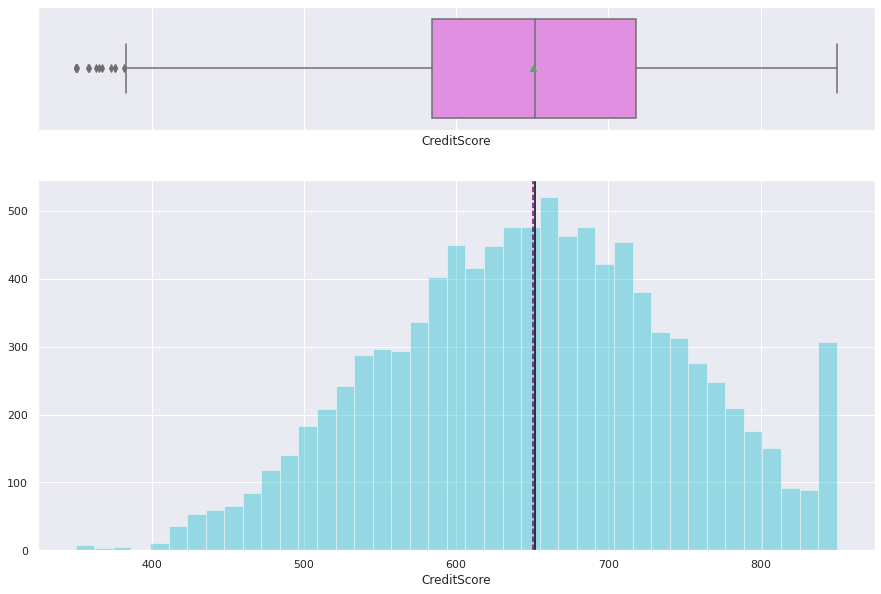

In [444]:
histogram_boxplot(df["CreditScore"])

credit score has some outliers with a few below 400

#### Observation on Age                


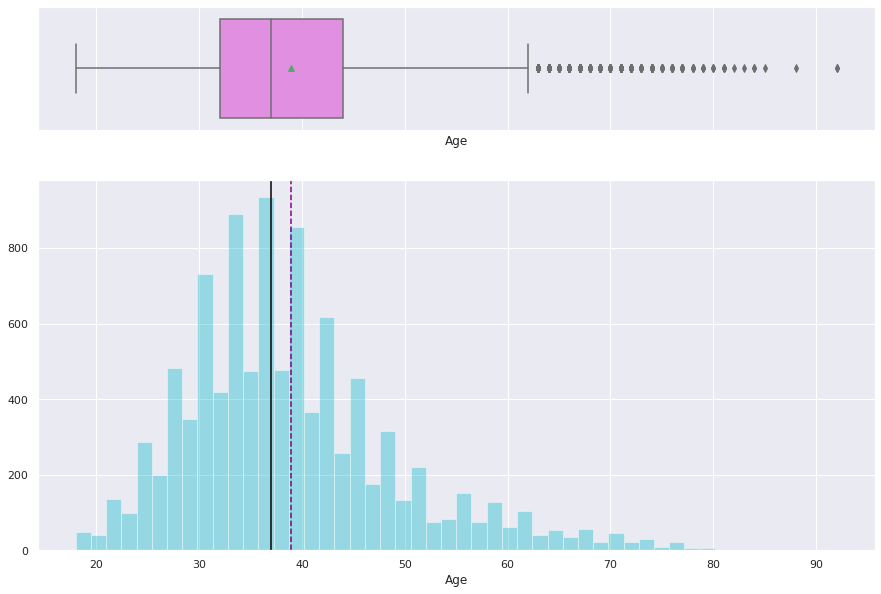

In [445]:
histogram_boxplot(df["Age"])

#### Observation on Tenure             


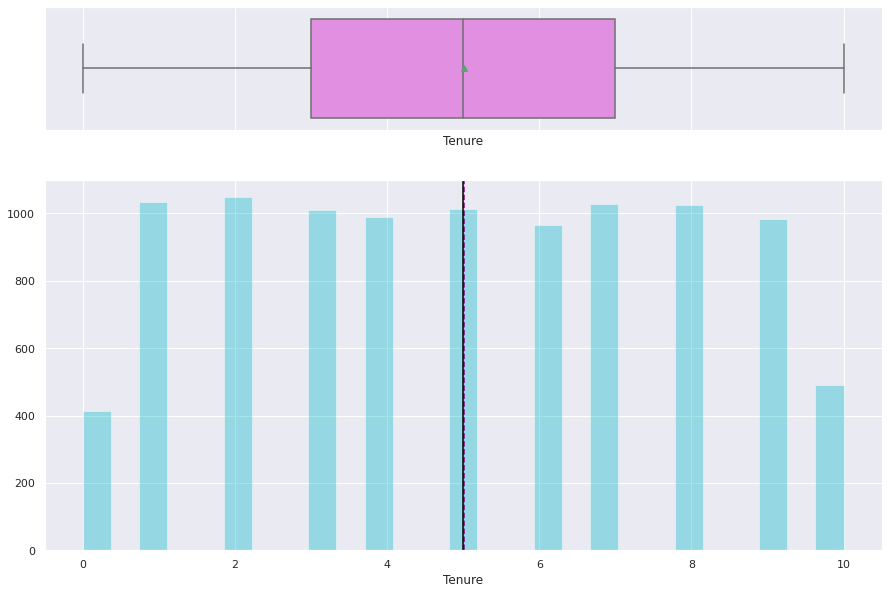

In [446]:
histogram_boxplot(df["Tenure"])

#### Observation on Balance            


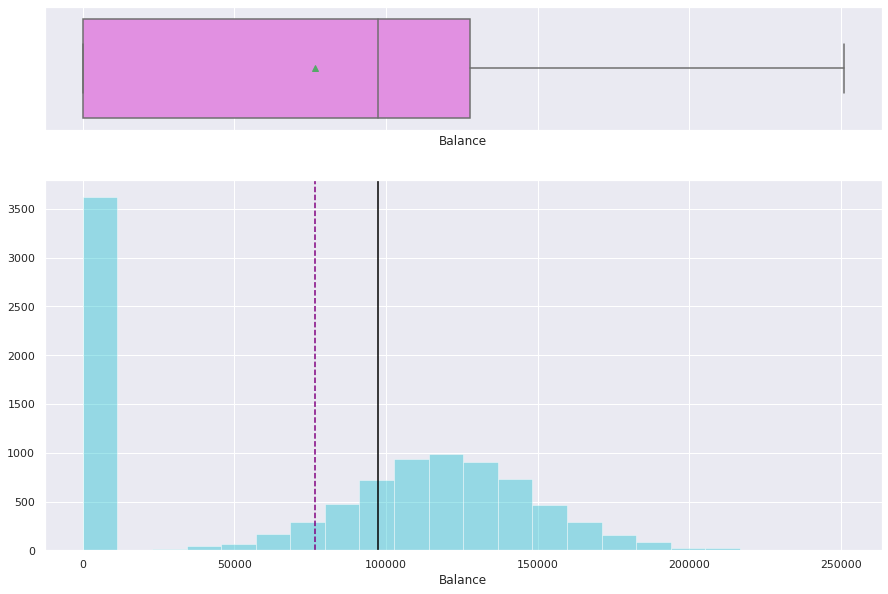

In [447]:
histogram_boxplot(df["Balance"])

3500 customers have 0 balance

#### Observation on NumOfProducts      


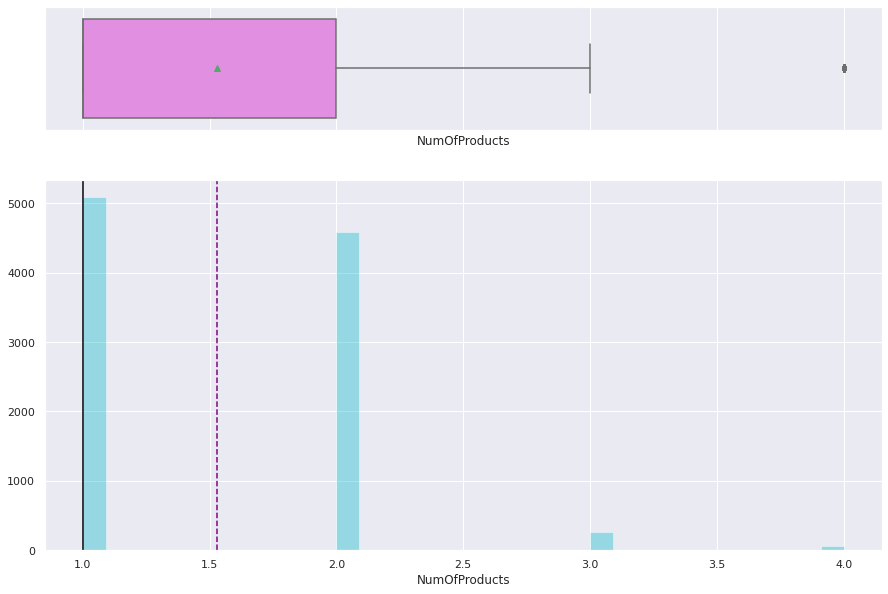

In [448]:
histogram_boxplot(df["NumOfProducts"])

#### Observation on EstimatedSalary    


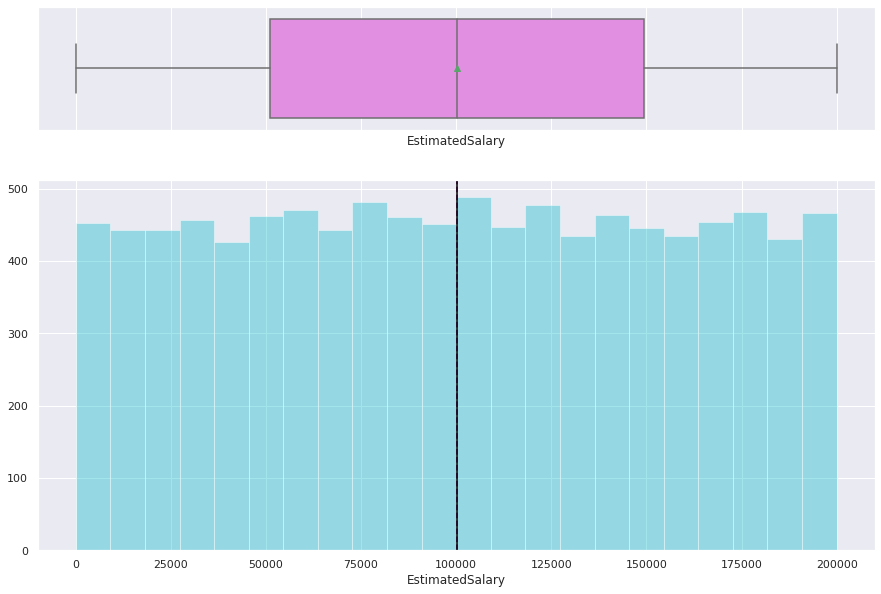

In [449]:
histogram_boxplot(df["EstimatedSalary"])

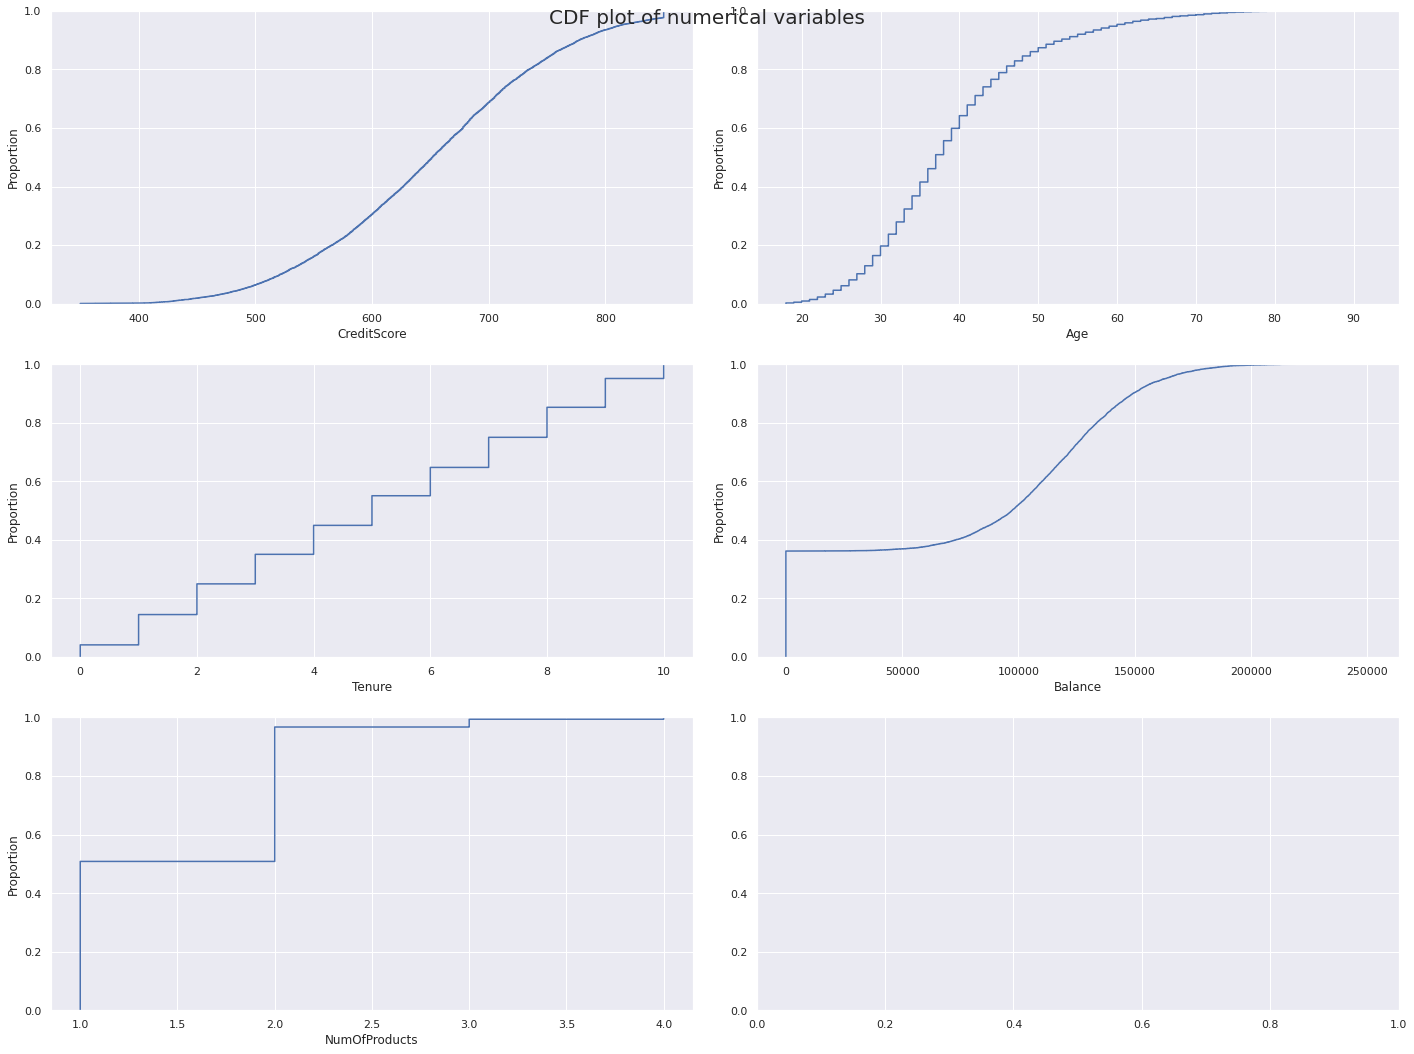

In [450]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

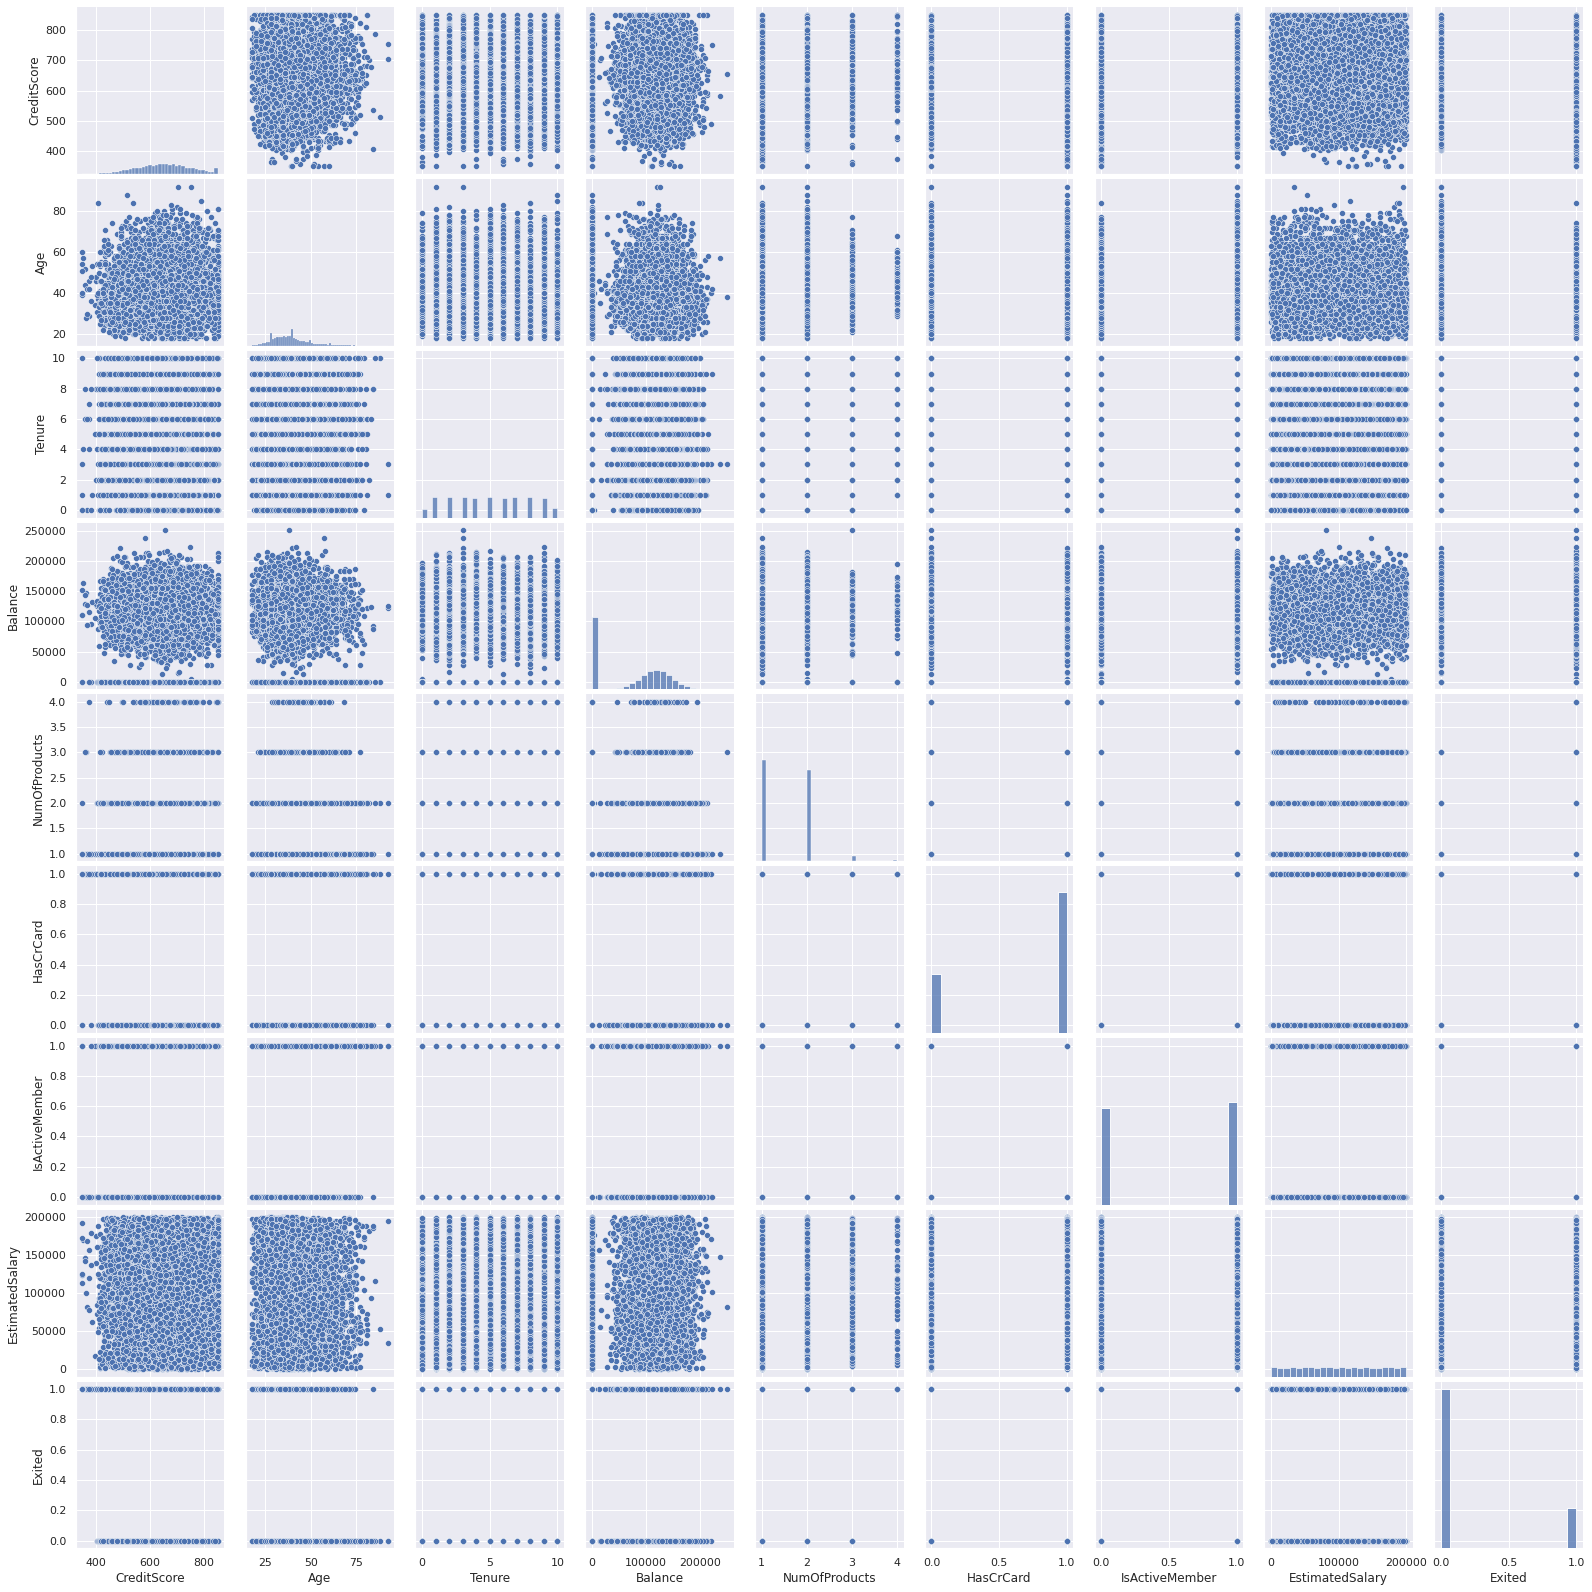

In [451]:
sns.pairplot(df, palette="husl")

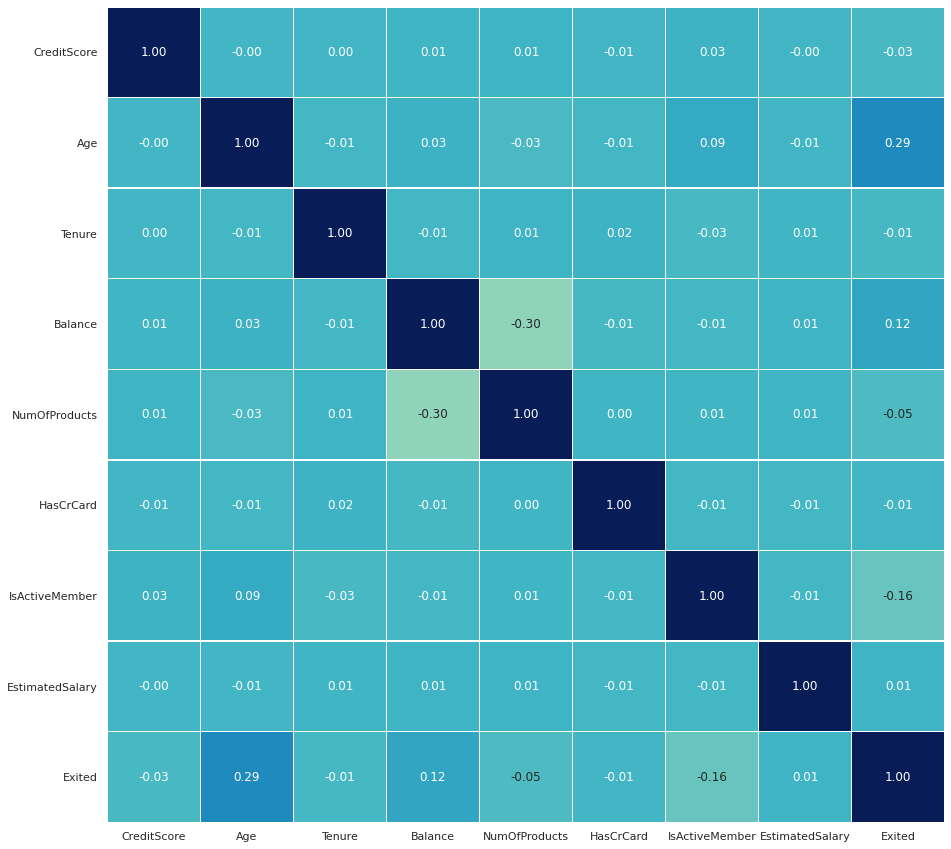

In [452]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

Age has positive correlation with exit

Balance has negative correlation with number of productions

Active memeber has negative correlation with exit


In [453]:
df.groupby(["Exited"]).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [454]:
df.groupby(["IsActiveMember"])['Exited'].count()

IsActiveMember
0    4849
1    5151
Name: Exited, dtype: int64

Active or not not influece if the customer exits are not.

In [455]:
df.groupby(["Gender"])['Exited'].sum()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

Bank lost more female customers than male.

In [456]:
df.groupby(["Geography"])['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Germany has lost more customers

## Data Pre-processing
- Split the target variable and predictors 
- Split the data into train and test 
- Rescale the data

In [457]:
#Number of distinct categories or classes i.e., exited or not
df['Exited'].nunique()

2

In [458]:
#checking the percentage of each class in the dataset
(df.Exited.value_counts())/(df.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

This shows a complete imbalance of classes. There are 79.63% 'Still Customers' (0) instances and only 20.37% 'No Longer Customers' (1) instances. 

This means that we are aiming to predict anomalous events.

In [459]:
print("*********Losses due to Customer Leaving:************\n")
print("Total Balance lost")
print(df.Balance[df.Exited == 1].sum())
print("Mean Balance per Exited customers")
print(df.Balance[df.Exited == 1].mean())
print("Compare to Current customers:")
print("Total balance from Current customers")
print(df.Balance[df.Exited == 0].sum())
print("Mean balance per Current customers")
print(df.Balance[df.Exited == 0].mean())

*********Losses due to Customer Leaving:************

Total Balance lost
185588094.63
Mean Balance per Exited customers
91108.53933726063
Compare to Current customers:
Total balance from Current customers
579270798.25
Mean balance per Current customers
72745.29677885193


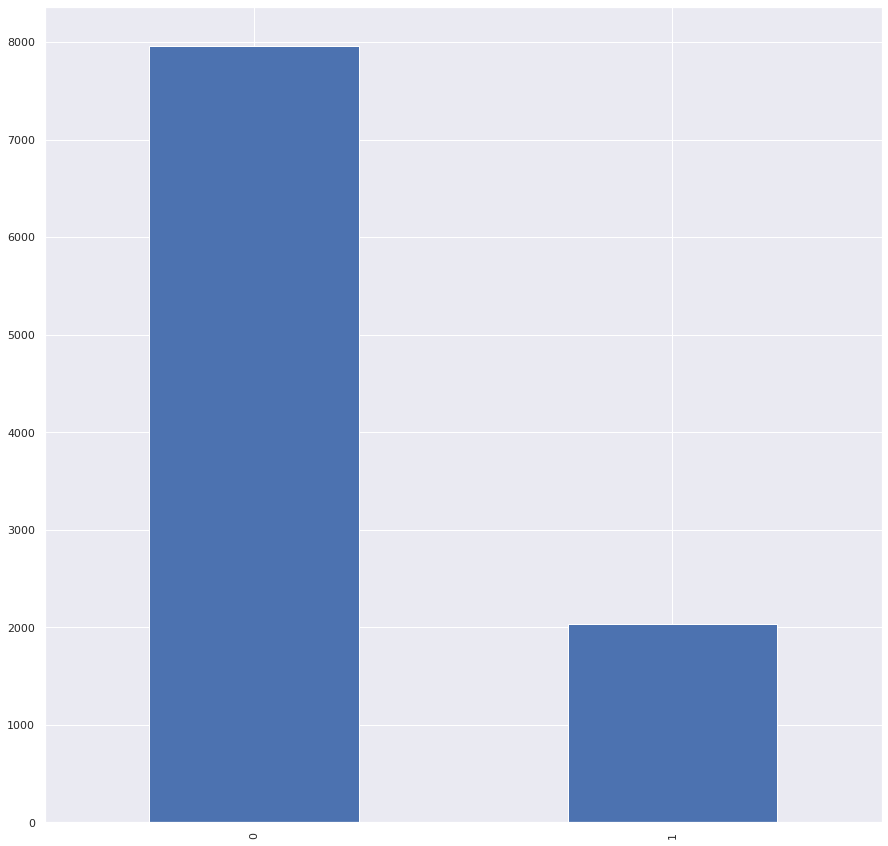

In [460]:
#visual representation of instances per class
df.Exited.value_counts().plot.bar()

In [461]:
columns= ["Geography", "Gender"]
for feature in columns:
    le= LabelEncoder()
    df[feature]= le.fit_transform(df[feature])
    df[feature].astype("int64")

In [462]:
df= pd.get_dummies(df,columns= ['Geography','Gender'],drop_first=True)


In [463]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


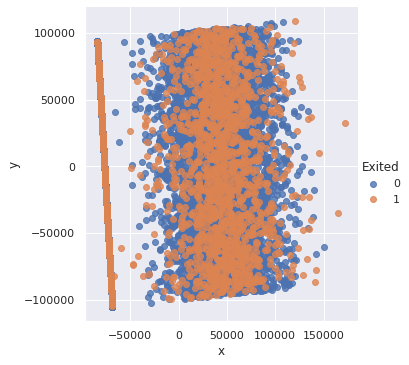

In [464]:
#PCA is performed for visualization only

pca= PCA(n_components=2)
bank_2d= pd.DataFrame(pca.fit_transform(df.iloc[:,0:10]))
bank_2d= pd.concat([bank_2d, df['Exited']], axis=1)
bank_2d.columns= ['x', 'y', 'Exited']
sns.lmplot(x='x', y='y', data=bank_2d, fit_reg=False, hue='Exited')

PCA gives a better visualization of the imbalance in the datasets.

In [465]:
#Separating response variable and predictors¶

X_data = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',
       'Geography_1', 'Geography_2', 'Gender_1']]
y_data = df[['Exited']]

In [466]:
X_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [467]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)

(10000, 1)
(10000, 11)


In [468]:
y_data


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Splitting the Data into train and test set


In [469]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [470]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000, 1)
(2000, 1)


In [471]:
y_test.Exited.value_counts()

0    1589
1     411
Name: Exited, dtype: int64

### Scaling Data

In [472]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model building
- Build Neural Network

### Random Forest for baseline

In [473]:
random_forest = RandomForestClassifier(n_estimators=200)

In [474]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [475]:
y_pred = random_forest.predict(X_test)


In [476]:
random_forest.score(X_test,y_test)


0.862

In [477]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

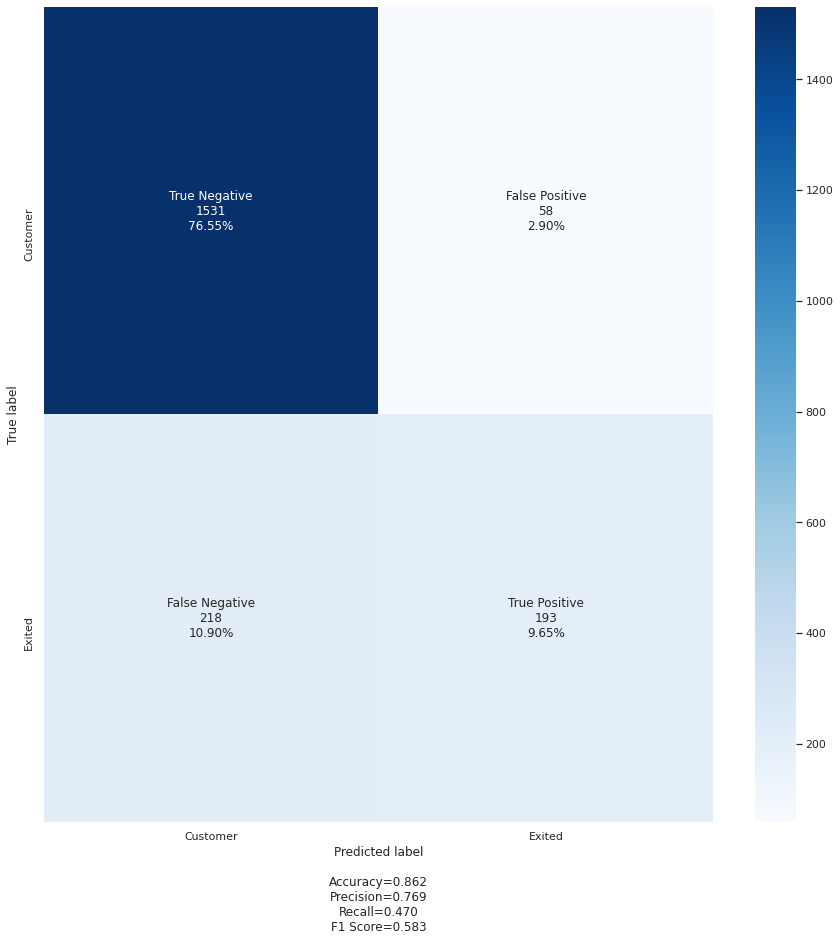

In [478]:
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Customer','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Model evaluation criterion

**Model can make wrong predictions as:**

- Predicting a customer exited but is still a customer
- Predicting a customer did not exit and he is no longer a customer

**Which case is more important?**

Predicting that customer did not exit and he is no longer a customer. It might mean banks in not focussing on customers who might leave which means heavy loss to the bank.

**How to reduce this loss i.e need to reduce False Negative?**

Company would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the customers who are likely to exit.

**Conclusion:**

while only 57 regular transactions are wrongly predicted as fraudulent, the model only detects 47% of the exited customers. As a consequence 215 exited customers are not detected (False Negatives).

Let's see if we can improve this performance with other machine learning / deep learning models in the rest of the notebook.


### Deep neural network

We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each customer, ie each line with 11 columns from the dataset. For each customner, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exited (0) or exited (1).
a dropout step is included to prevent overfitting.

In [479]:
#initialize the model
model = Sequential()

In [480]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 13 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

In [481]:
# Compile the model
from tensorflow import keras
model.compile(keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [482]:
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_49 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_18 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_51 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
___________________________________________________

In [483]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=20,validation_split=0.2)


Epoch 1/20
427/427 [==============================] - 2s 3ms/step - loss: 0.4957 - accuracy: 0.7836 - val_loss: 0.4666 - val_accuracy: 0.7931
Epoch 2/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4425 - accuracy: 0.8019 - val_loss: 0.4524 - val_accuracy: 0.7900
Epoch 3/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8067 - val_loss: 0.4545 - val_accuracy: 0.7950
Epoch 4/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8141 - val_loss: 0.4359 - val_accuracy: 0.8100
Epoch 5/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8281 - val_loss: 0.4066 - val_accuracy: 0.8356
Epoch 6/20
427/427 [==============================] - 1s 3ms/step - loss: 0.3885 - accuracy: 0.8420 - val_loss: 0.3840 - val_accuracy: 0.8450
Epoch 7/20
427/427 [==============================] - 1s 3ms/step - loss: 0.3769 - accuracy: 0.8486 - val_loss: 0.3806 - val_accuracy: 0.8550
Epoch 

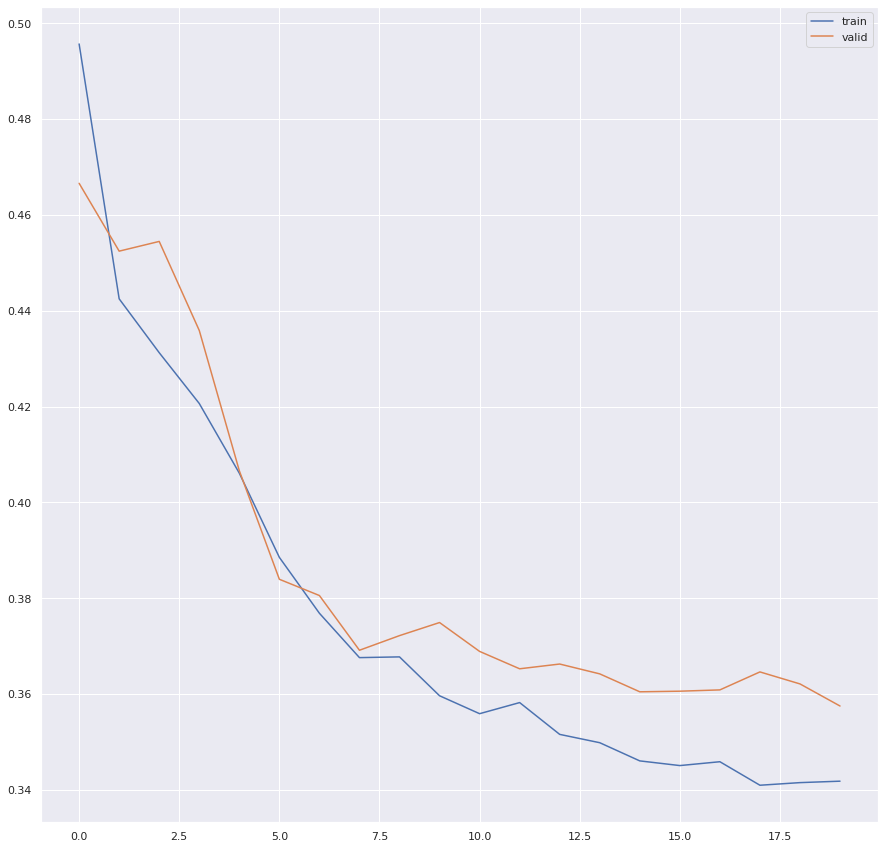

In [484]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

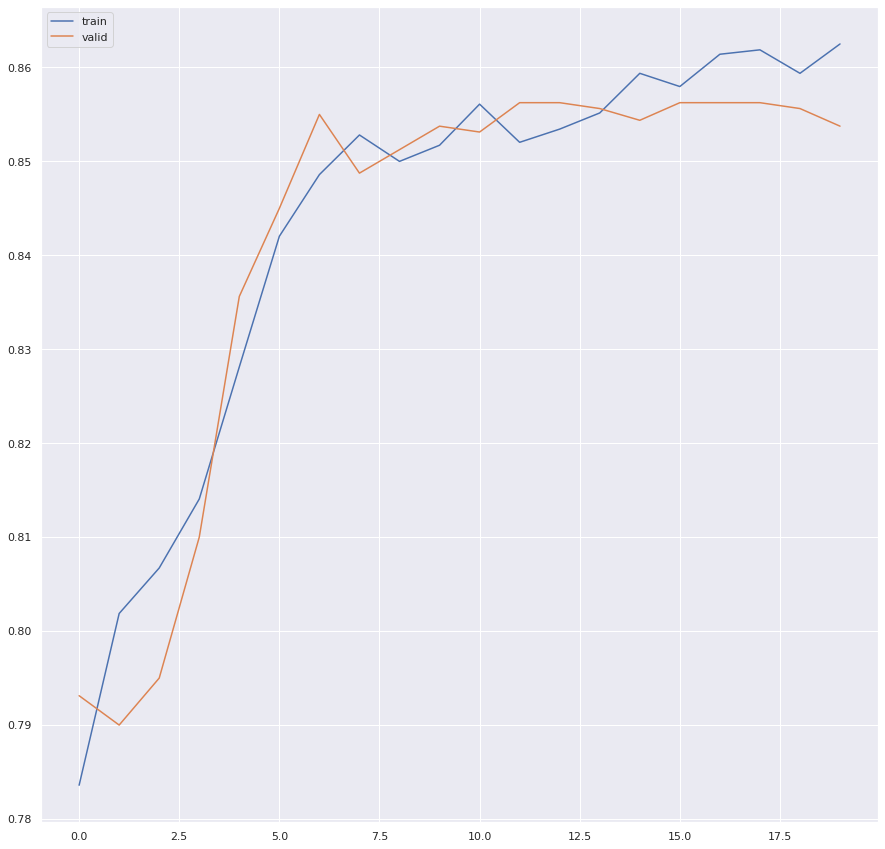

In [485]:
# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train", "valid"), loc = 0)

In [486]:
score = model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8535


Our model acheived 85% accuracy. 


In [487]:
print(score)


[0.35558170080184937, 0.8535000085830688]


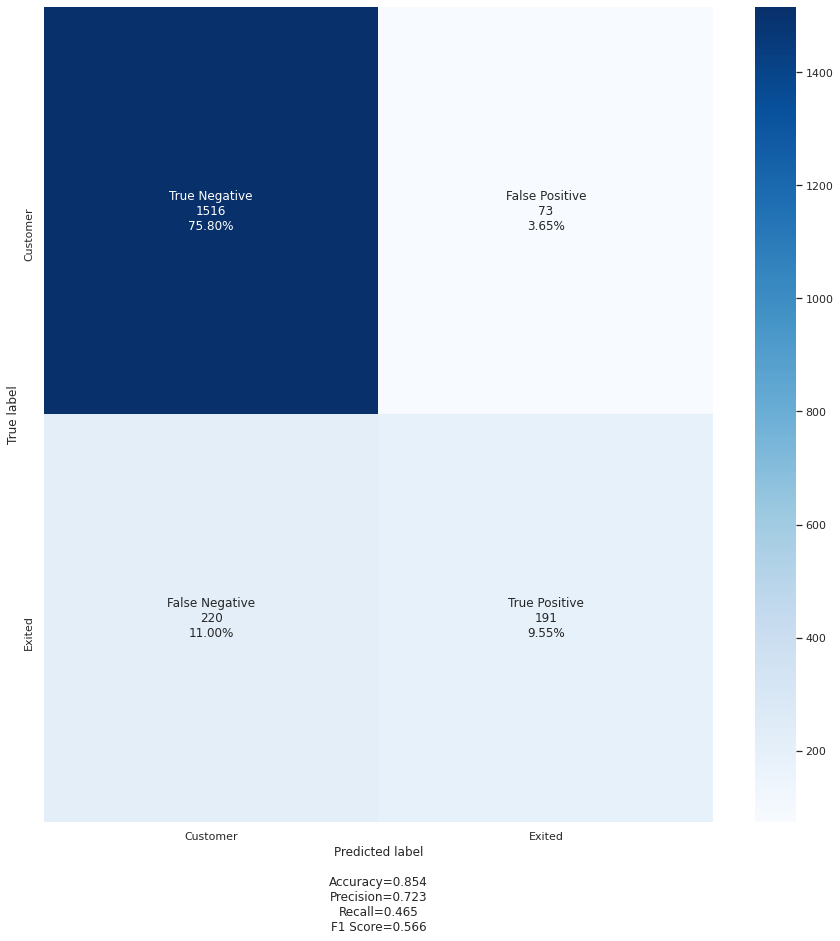

In [488]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Customer','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Detection of exited customers did not improve compared to the previous machine learning model ( Randomforest).

**Recall went down from 47% to 43%**

There are 411 exited customers in the test data and yet 233 exited customers are not identified (false negative) which remains an issue. Our objective must be to perdict as many exited customers as possible since these can have a huge negative impact.

55 customers are predicted as exited but they are still customers by the model. These are false positive. This number has not changed much from randomforest. 

**Conclusion:**

We must find ways to further reduce the number of false negative.

This model is overfitting.

### Model-2 Early Stopping and Using weights

In [489]:
from tensorflow import keras

In [490]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=45,
                             verbose=1, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(24, input_shape=(11, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.2))

Model2.add(Dense(24, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.2))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=800, epochs=50, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.7607 - accuracy: 0.6581 - val_loss: 0.5675 - val_accuracy: 0.7881
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5346 - accuracy: 0.7866 - val_loss: 0.4790 - val_accuracy: 0.8019
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4750 - accuracy: 0.7864 - val_loss: 0.4645 - val_accuracy: 0.8019
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.8041 - val_loss: 0.4593 - val_accuracy: 0.7956
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4441 - accuracy: 0.8084 - val_loss: 0.4481 - val_accuracy: 0.7994
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4397 - accuracy: 0.8061 - val_loss: 0.4417 - val_accuracy: 0.8056
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4355 - accuracy: 0.8116 - val_loss: 0.4380 - val_accuracy: 0.8056
Epoch 8/50
8/8 [=================

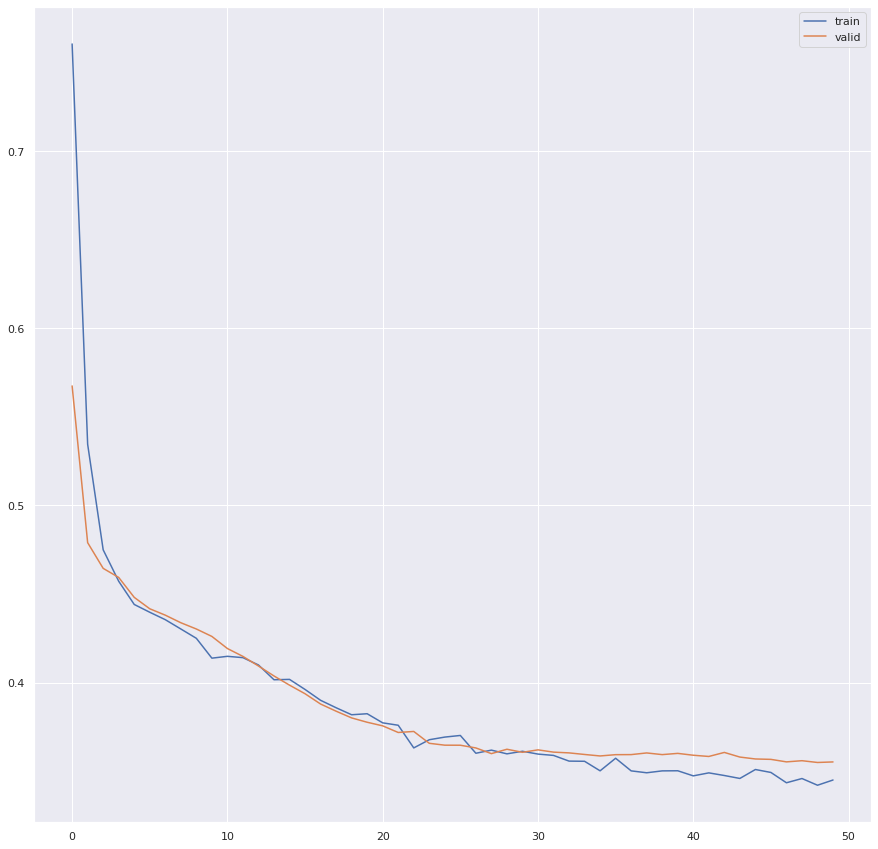

In [491]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

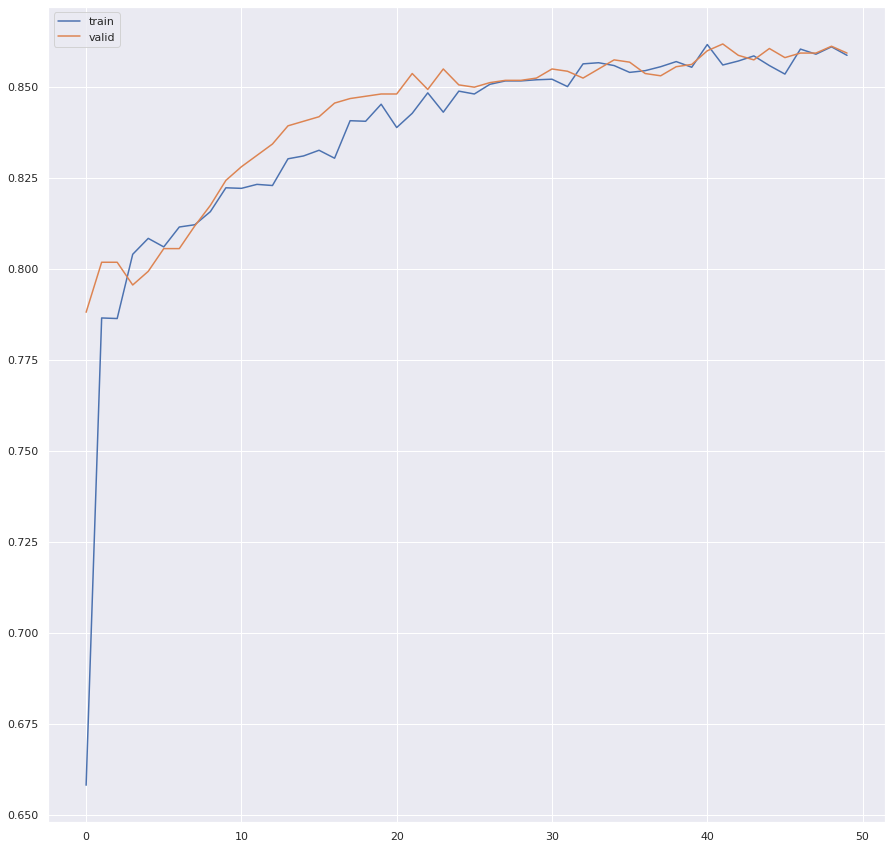

In [492]:
# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

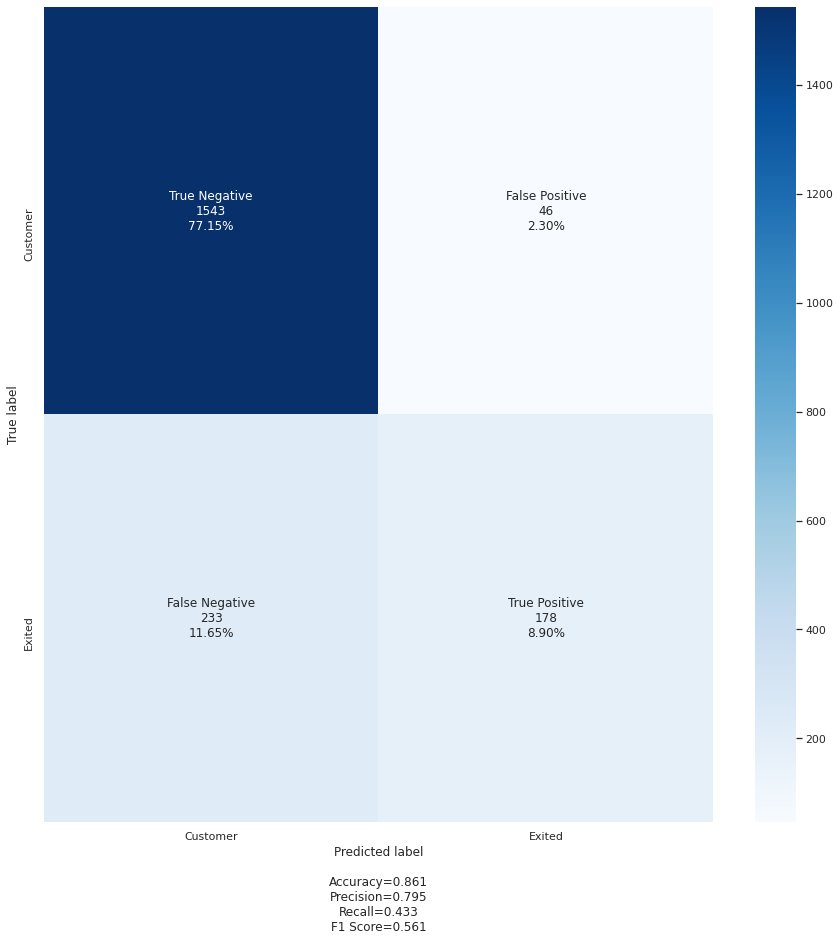

In [493]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Customer','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

False positives have come down from 53 to 43

As you can see here the Recall of the model is not improved and it is worse than the Previous ANN model as well as the RandomForest.

**recall went down freom 43%[47% RF] to 41%**


In [494]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
#class_weights = dict(enumerate(class_weights))
#class_weights
# could not get this code to run so manually setting weight

In [495]:
model.fit(X_train,y_train,batch_size=25,epochs=50, class_weight={0: 5, 1: 15}, shuffle=True)

Epoch 1/50
320/320 [==============================] - 1s 4ms/step - loss: 3.3383 - accuracy: 0.8242
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 3.2426 - accuracy: 0.8156
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 3.2364 - accuracy: 0.8207
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1892 - accuracy: 0.8269
Epoch 5/50
320/320 [==============================] - 1s 4ms/step - loss: 3.2067 - accuracy: 0.8267
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1776 - accuracy: 0.8198
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1815 - accuracy: 0.8313
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1773 - accuracy: 0.8164
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1640 - accuracy: 0.8234
Epoch 10/50
320/320 [==============================] - 1s 3ms/step - loss: 3.1119 - accuracy: 0.8264

In [496]:
score_weighted = model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7970


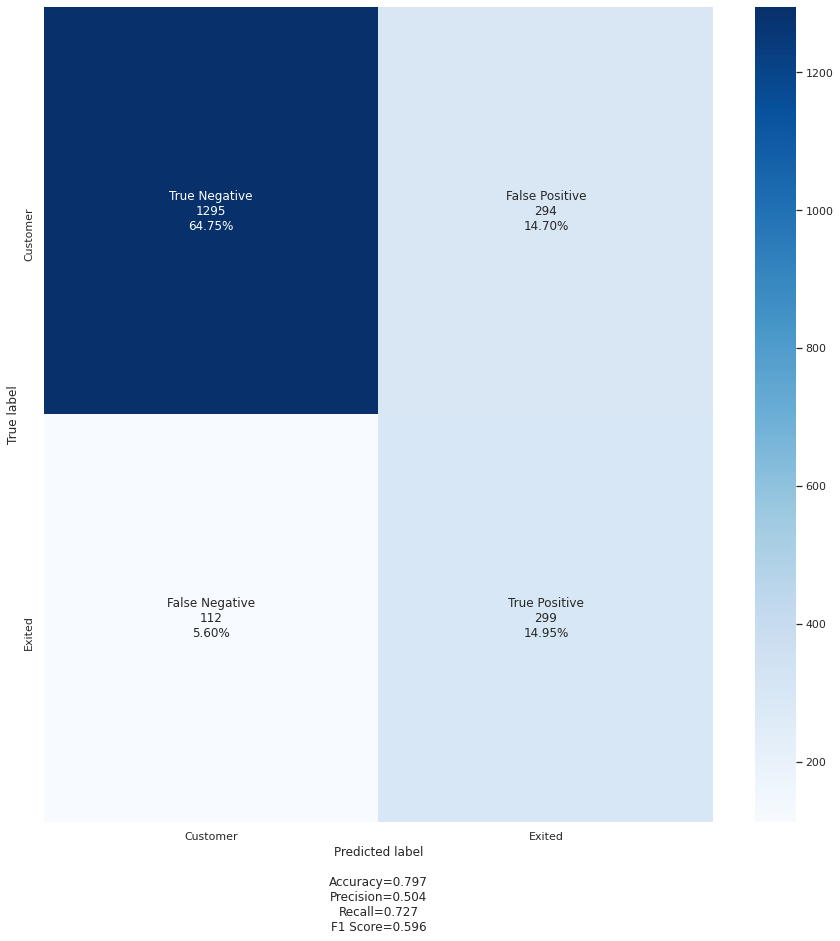

In [497]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Customer','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**This model has the best recall 78% up ~20%**

FN went down from 240 to 89 which is a huge improvement. 

But the False Postives has gone up a lot. 

Acuracy went down from ~85 to 76 which is acceptable. 

Precision and  have gone down a lot from 77 to 46. 

Adding class weights to the model has done really well for this model. 


Since our criteria for model selection is Recall i would suggest we use this model as the final model. There definetly scope for improvement for this model by improving the class imbalance. 


## Conclusion and key takeaways

**Best Model Parameters**

1.   batch_size=25
2.   epochs=50
3.   class_weight={0: 5, 1: 15}
4.   Optimizer: Adam

Instead of manually figuring out the parameters the model could use keras tuner to help find the optimnal parameters. 

Class imbalance is one of the reason for the models to have poor performance. if we can do resampling may be it can help. 
